<a href="https://colab.research.google.com/github/shehadeh7/APS360-Project/blob/main/new_model_using_preProcessedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [2]:
!unzip processed_data.zip

Archive:  processed_data.zip
  inflating: x_data.npy              
  inflating: y_data.npy              


In [5]:
# load X and Y from npy files
x_path = './x_data.npy'
y_path = './y_data.npy'
X = np.load(x_path)
Y = np.load(y_path)

In [6]:
print(X.shape)
print(Y.shape)

(11317, 352, 16)
(11317,)


In [11]:
# shuffle X and Y same way
# random_state to seed the shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [13]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(criterion='entropy')

training_split = 0.8 # use 80% of data for training

#Train the model using the training sets y_pred=clf.predict(X_test)
# Flatten X to a 2d array for random forest
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape(nsamples, nx*ny)
clf.fit(X_train_2d, y_train)

RandomForestClassifier(criterion='entropy')

In [14]:
# Perform prediction
t_samples, tx, ty = X_test.shape
X_test_2d = X_test.reshape(t_samples, tx*ty)
y_pred=clf.predict(X_test_2d)

In [15]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[211  33  42  40  26  26]
 [ 21 260  13  47  16  21]
 [ 61  11 258  32  11   7]
 [ 43  66  36 191  24  27]
 [ 75  81  30  50 127  23]
 [ 44  72  16  37  21 165]]


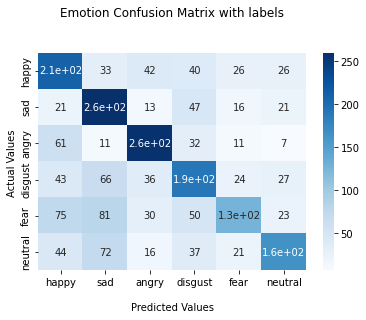

In [16]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Emotion Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral'])
ax.yaxis.set_ticklabels(['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
# Report useful metrics
ascore = sklearn.metrics.accuracy_score(y_test, y_pred)
rscore = sklearn.metrics.recall_score(y_test, y_pred, average='macro')
pscore = sklearn.metrics.precision_score(y_test, y_pred, average='macro')
fscore = sklearn.metrics.f1_score(y_test, y_pred, average='macro')
print('Accuracy:{}, Precision:{}, Recall:{}, F1:{}'.format(ascore, pscore, rscore, fscore))

Accuracy:0.5353356890459364, Precision:0.5454947347133173, Recall:0.5353872404280337, F1:0.5302247678474761


In [ ]:
import tensorflow as tf

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((nx, ny), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

# # Wrap the model with adversarial regularization.
# adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
# adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# Compile, train, and evaluate.
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compile, train, and evaluate.
model.compile(optimizer=rms,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_val, y_val))
#model.evaluate(X_test, y_test)

Epoch 1/30
213/213 [==============================] - 4s 14ms/step - loss: 23.4124 - accuracy: 0.2833 - val_loss: 36.7933 - val_accuracy: 0.1988
Epoch 2/30
213/213 [==============================] - 3s 14ms/step - loss: 9.9250 - accuracy: 0.3731 - val_loss: 6.4997 - val_accuracy: 0.3653
Epoch 3/30
213/213 [==============================] - 3s 14ms/step - loss: 4.9701 - accuracy: 0.4146 - val_loss: 5.9096 - val_accuracy: 0.3516
Epoch 4/30
213/213 [==============================] - 3s 13ms/step - loss: 3.0779 - accuracy: 0.4336 - val_loss: 2.8233 - val_accuracy: 0.4103
Epoch 5/30
213/213 [==============================] - 3s 14ms/step - loss: 2.3307 - accuracy: 0.4607 - val_loss: 3.0191 - val_accuracy: 0.3644
Epoch 6/30
213/213 [==============================] - 3s 15ms/step - loss: 1.9455 - accuracy: 0.4705 - val_loss: 2.5118 - val_accuracy: 0.3922
Epoch 7/30
213/213 [==============================] - 3s 15ms/step - loss: 1.6867 - accuracy: 0.4830 - val_loss: 3.1973 - val_accuracy: 0.34